In [1]:
import csv
import numpy as np
from numpy import diff
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import asarray as ar,exp
import math
import pandas as pd 
from pandas import DataFrame, read_csv


In [2]:
cd /Users/austinmcdonald/Desktop/data/NaI test/CS137/little crystal/Cs-137_7-5/Coupled

/Users/austinmcdonald/Desktop/data/NaI test/CS137/little crystal/Cs-137_7-5/Coupled


In [3]:
os.listdir()

['.DS_Store',
 'Cs137 Spectrum1.pdf',
 'Cs137 Spectrum2.pdf',
 'Cs_137_Coupled_run1.jpg',
 'F1Coupled_Area_Hist_800k_1kV00000.csv',
 'F2Coupled_Pulse_Hist_800k_1kV00000.csv']

In [4]:
dat = np.genfromtxt('F2Coupled_Pulse_Hist_800k_1kV00000.csv',delimiter=',',skip_header=1,skip_footer=315)
#BG = np.genfromtxt('F1Background_Run00000.csv',delimiter=',',skip_header=1,skip_footer=315)
datas = np.flipud(dat[:,1])
#backg = np.flipud(BG[:,1])
len(data)

NameError: name 'data' is not defined

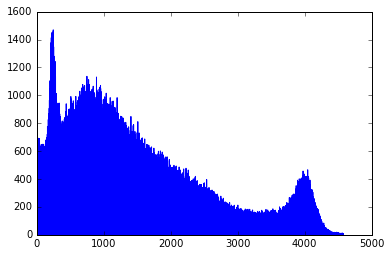

In [5]:
xva = np.arange(1,len(datas)+1)
#plt.xlim([2400,3700])
plt.plot(xva,datas)
plt.show()

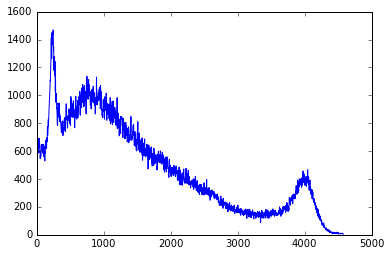

In [6]:
df = pd.DataFrame({'xvals':xva,'counts':datas})
Cdata = df[df['counts']>0]

plt.plot(Cdata['xvals'],Cdata['counts'])
plt.show()

In [7]:
xvals = np.array(Cdata['xvals'])
data = np.array(Cdata['counts'])
len(data)

1602

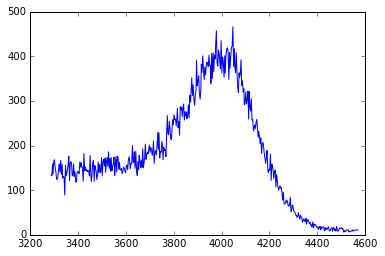

In [8]:
xcut = 1150
ycut = 1600

data0 = data[xcut:ycut]
xval0 = xvals[xcut:ycut]
plt.plot(xval0,data0)
plt.show()

Peak = 3908.76802243


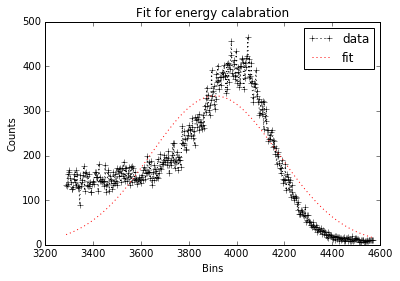

In [9]:
x = xval0
y = data0

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*popt),'r:',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Bins')
plt.ylabel('Counts')
print('Peak =',popt[1])
plt.show()

In [10]:
print(1200-xpeak)
print(xpeak -182)
4685-4080
4080+605

-2847
3865


4685

In [11]:
Tarea = np.sum(data0)
Tarea

79171.0

In [12]:
'''
len(data0)
'''

'\nlen(data0)\n'

In [13]:
le = len(data0)
BackBig = data0[0:50]
BackSmall = data0[le-50:le]
backB = np.sum(BackBig)/50
backS = np.sum(BackSmall)/50

In [14]:
Fracarea = np.cumsum(data0)
Farea = Fracarea/Tarea

In [15]:
background = (1-Farea)*backB + Farea*backS

In [16]:
test = data0 - background

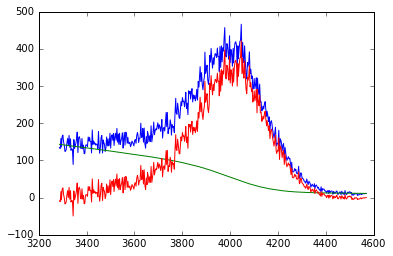

In [17]:
plt.plot(xval0,data0)
plt.plot(xval0,background)
plt.plot(xval0,test)
plt.show()

Peak Position= 3997.34542209


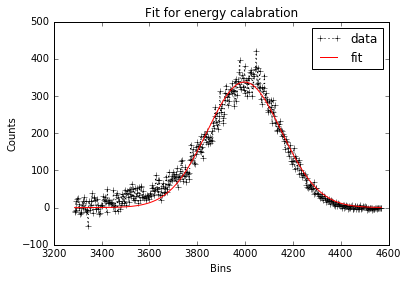

In [18]:
x = xval0
y = test

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

fitted = popt

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitted),'r',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Bins')
plt.ylabel('Counts')
print('Peak Position=',fitted[1])
plt.show()

In [19]:
ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]
pos

266

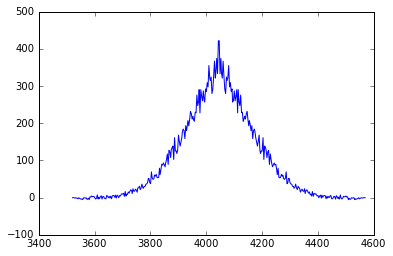

In [20]:
right = y[pos:len(y)]
left = np.flipud(right)
halfP = np.append(left,[right])

dif = len(y)-len(halfP)
xvalP = x[dif:len(y)]

plt.plot(xvalP,halfP)
plt.show()

Peak = 319.966450374
Peak Position= 4045.42993334
sigma= 119.000614384
FWHM= 280.246446875
hash Resolution= 87.5861974117
Energy Resolution= 42.3333001322


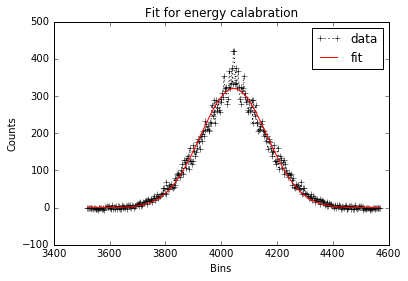

In [21]:
x = xvalP
y = halfP

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*popt),'r',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Bins')
plt.ylabel('Counts')
print('Peak =',popt[0])
print('Peak Position=',popt[1])
print('sigma=',popt[2])
print('FWHM=',2.355*popt[2])
print('hash Resolution=',2.355*popt[2]/popt[0]*100)
print('Energy Resolution=',2.355*popt[2]/662*100)
plt.show()

In [22]:
# 661.64 = k * 1022
k= 661.64/fitted[1]

Peak Height = 337.625859045
Peak Position = 661.639976725
sigma = 25.7542674617
FWHM = 60.6512998722
Energy Resolution = 9.16681307142


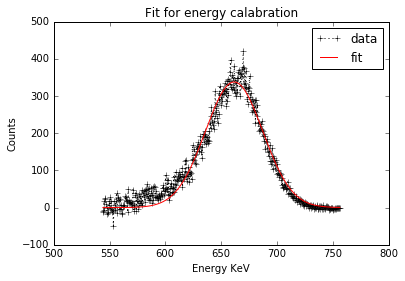

In [23]:
x = k*xval0
y = test

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

fitt = popt

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitt),'r',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Energy KeV')
plt.ylabel('Counts')

print('Peak Height =',fitt[0])
print('Peak Position =',fitt[1])
print('sigma =',fitt[2])
print('FWHM =',2.355*fitt[2])
print('Energy Resolution =',2.355*fitt[2]/fitt[1]*100)
er = 2.355*fitt[2]/fitt[1]*100

plt.show()

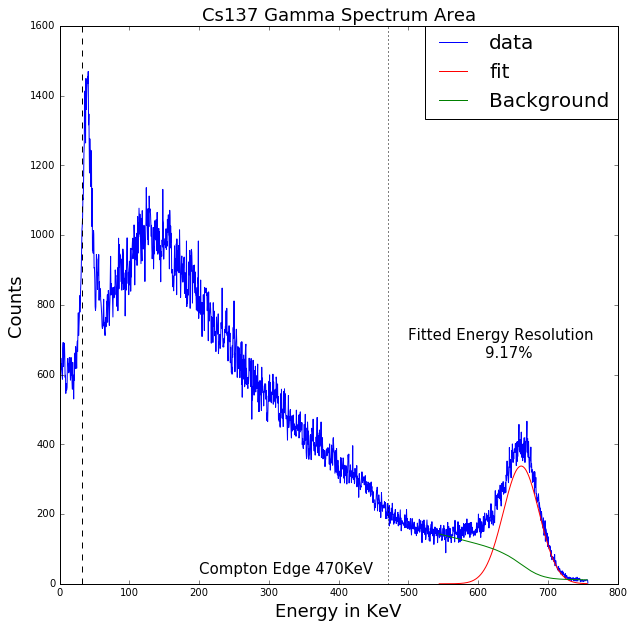

In [29]:
plt.figure(figsize=(10,10))

perc = ["%.2f" % er + '%']

plt.plot(k*xvals,data,label='data')
#plt.ylim([0,550])
#plt.xlim([0,800])
#plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitt),'r',label='fit')
plt.plot(k*xval0,background,label='Background')
plt.legend(bbox_to_anchor=(.655, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.axvline(470, color='k', linestyle=':')
plt.text(200,30,'Compton Edge 470KeV',rotation=0,fontsize=15,color='k')

plt.axvline(32, color='k', linestyle='--')

plt.text(500,700,'Fitted Energy Resolution',rotation=0,fontsize=15,color='k')
plt.text(610,650,perc[0] ,rotation=0,fontsize=15,color='k')

plt.xlabel('Energy in KeV', fontsize= 18)
plt.ylabel('Counts', fontsize= 18)
plt.title('Cs137 Gamma Spectrum Area', fontsize= 18)



#plt.savefig('Cs137 Spectrum1.pdf')
plt.show()

In [25]:
dat1 = np.genfromtxt('F1Coupled_Area_Hist_800k_1kV00000.csv',delimiter=',',skip_header=1,skip_footer=315)
#BG = np.genfromtxt('F1Background_Run00000.csv',delimiter=',',skip_header=1,skip_footer=315)
data1 = np.flipud(dat1[:,1])
xvals1 = np.arange(1,len(data1)+1)
#backg = np.flipud(BG[:,1])
k2 = 0.159735469002
len(data1)

4685

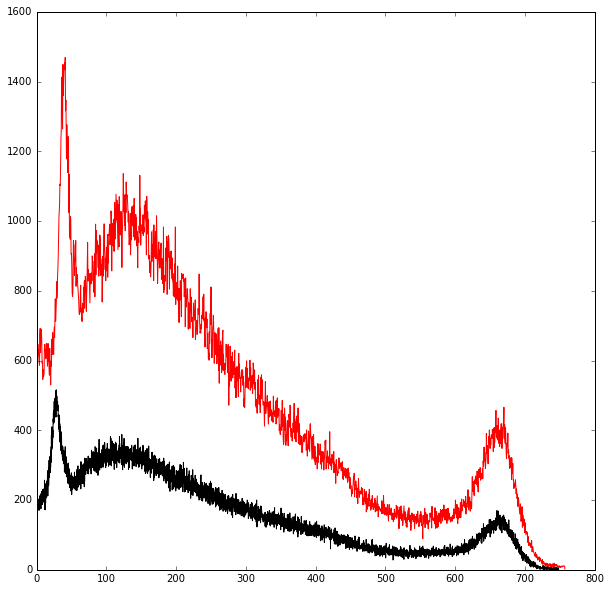

In [26]:
# plot both spectrums over eatchother
plt.figure(figsize=(10,10))

plt.plot(k2*xvals1,data1,label='Area Spec',color='k')
plt.plot(k*xvals,data,label='Pht Spec',color='r')
plt.show()

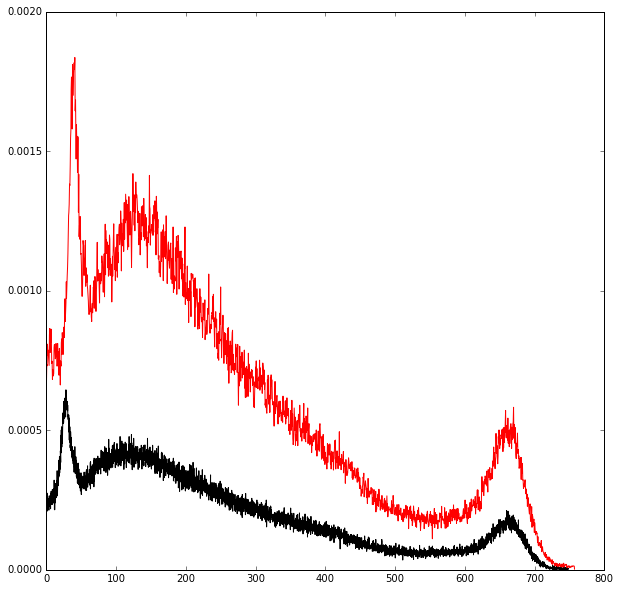

In [27]:
# notmalize the spectrums and replot
Atot = np.sum(data1)
Ptot = np.sum(data)

Amx = max(data1)
Pmx = max(data)

ct = 800000

plt.figure(figsize=(10,10))

plt.plot(k2*xvals1,data1/ct,label='Area Spec',color='k')
plt.plot(k*xvals,data/ct,label='Pht Spec',color='r')
plt.show()

In [28]:
sum(data/Ptot)

0.99999999999999922